# Retrieve CMIP6 model output

- Access Climate Model Output Using `AWS.jl` and `Zarr.jl`
- Choose institution_id, source_id, variable_id
- Compute and plot (1) time mean global map and (2) time evolving global mean

In [1]:
using ClimateModels, Plots, Statistics

## Access Model Ouput

Here we select that we want to access temperate `tas` from a model by `IPSL`.

In [2]:
(mm,gm,meta)=cmip("IPSL","IPSL-CM6A-LR","tas")

(Dict{String, AbstractArray{Union{Missing, Float32}, N} where N}("lat" => ZArray{Union{Missing, Float32}} of size 143, "m" => [221.32846f0 224.64265f0 … 256.6355f0 255.74043f0; 221.32846f0 224.52751f0 … 256.65802f0 255.74043f0; … ; 221.32846f0 224.76921f0 … 256.58832f0 255.74043f0; 221.32846f0 224.73734f0 … 256.59515f0 255.74043f0], "lon" => ZArray{Union{Missing, Float32}} of size 144), Dict{String, Vector{T} where T}("t" => [Dates.DateTime("1850-01-16T12:00:00"), Dates.DateTime("1850-02-15T00:00:00"), Dates.DateTime("1850-03-16T12:00:00"), Dates.DateTime("1850-04-16T00:00:00"), Dates.DateTime("1850-05-16T12:00:00"), Dates.DateTime("1850-06-16T00:00:00"), Dates.DateTime("1850-07-16T12:00:00"), Dates.DateTime("1850-08-16T12:00:00"), Dates.DateTime("1850-09-16T00:00:00"), Dates.DateTime("1850-10-16T12:00:00")  …  Dates.DateTime("2014-03-16T12:00:00"), Dates.DateTime("2014-04-16T00:00:00"), Dates.DateTime("2014-05-16T12:00:00"), Dates.DateTime("2014-06-16T00:00:00"), Dates.DateTime("2014-

## Plot Results

Afterwards, one often uses model output for further analysis. Here we
compute and plot (1) time mean global map and (2) time evolving global mean.

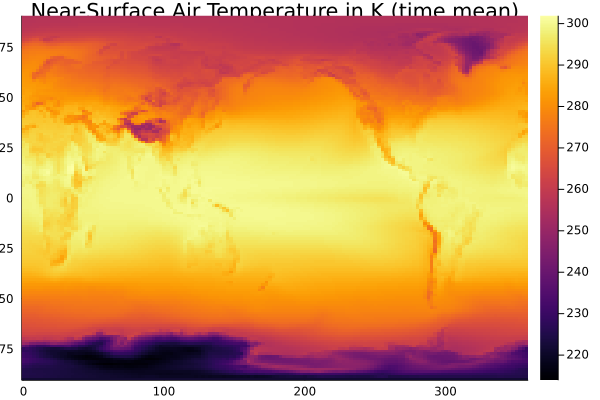

In [3]:
nm=meta["long_name"]*" in "*meta["units"]
m=heatmap(mm["lon"], mm["lat"], transpose(mm["m"]), title=nm*" (time mean)")

### Time Mean Seasonal Cycle

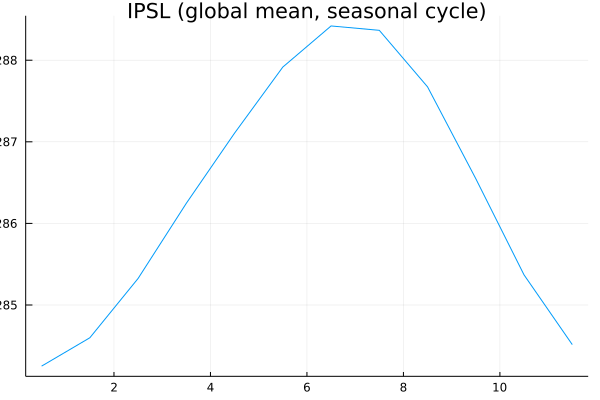

In [4]:
t=gm["t"]; y=gm["y"]
ylab=meta["long_name"]*" in "*meta["units"]
ny=Int(length(t)/12)
a_y=fill(0.0,(ny,12))
[a_y[:,i].=y[i:12:end] for i in 1:12]

s=plot([0.5:1:11.5],vec(mean(a_y,dims=1)), xlabel="month",ylabel=ylab,
leg = false, title=meta["institution_id"]*" (global mean, seasonal cycle)",frmt=:png)

### Month By Month Time Series

In [5]:
p=plot(gm["t"][1:12:end],gm["y"][1:12:end],xlabel="time",ylabel=nm,
title=meta["institution_id"]*" (global mean, Month By Month)",frmt=:png)
[plot!(gm["t"][i:12:end],gm["y"][i:12:end], leg = false) for i in 2:12];

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*